In [3]:
# Imports
#%matplotlib qt
%matplotlib inline

import matplotlib.pyplot as plt
import mne
import os
import numpy as np
from scipy.stats import pearsonr
from matplotlib import cm
import scipy
import sys

from fooof import FOOOF
from fooof import FOOOFGroup

In [2]:
fg = FOOOFGroup()

In [1]:
# Set up paths

# This base path will need updating
base_path = 'E:/PBA_Data/'

# These should stay the same
#subj_dat_fname = '._3001_resampled.set'
subj_dat_fname = '3002_resampled.set'

In [4]:
# Read in subject listed above

ev_dict = {'Rest_Start': 1001., 'Rest_End': 1002}
# event dictionary to ensure "Rest_Start" and "Rest_End"

full_path = os.path.join(base_path, subj_dat_fname)
#eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict, preload=True)

In [5]:
full_path

'E:/PBA_Data/3002_resampled.set'

In [63]:
eeg_dat.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : ndarray | 1970-01-01 00:00:00 GMT
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplo

In [64]:
eeg_dat.set_eeg_reference()
# set EEG average reference

The behavior of set_eeg_reference will change in 0.16 when ref_channels="average". Currently, a projection is computed, which has to be applied manually with the apply_proj method. In 0.16, the average reference will be directly applied. Set projection=True if you want to retain the old behavior, or set projection=False if you want the new behavior.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<ipython-input-64-be3e7d7f3762>:1: DeprecationWarning: The behavior of set_eeg_reference will change in 0.16 when ref_channels="average". Currently, a projection is computed, which has to be applied manually with the apply_proj method. In 0.16, the average reference will be directly applied. Set projection=True if you want to retain the old behavior, or set projection=False if you want the new behavior.
  eeg_dat.set_eeg_reference()


<RawEEGLAB  |  3002_resampled.fdt, n_channels x n_times : 65 x 1896482 (3793.0 sec), ~940.6 MB, data loaded>

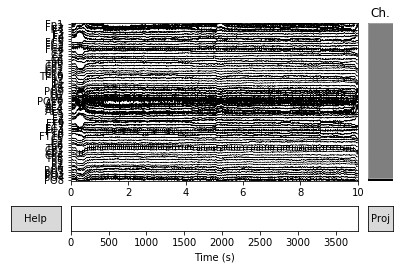

In [66]:
eeg_dat.plot(n_channels=64);

In [67]:
events = mne.find_events(eeg_dat)
event_id = {'Rest_Start': 1001}

epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id)

1132 events found
Events id: [   1    2    3   11   12   13   14   21   22   23   24   31   32   33
   34 1001 1002]
1 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [91]:
mne.Epochs?

Loading data for 1 events and 351 original time points ...
0 bad epochs dropped
Loading data for 1 events and 351 original time points ...


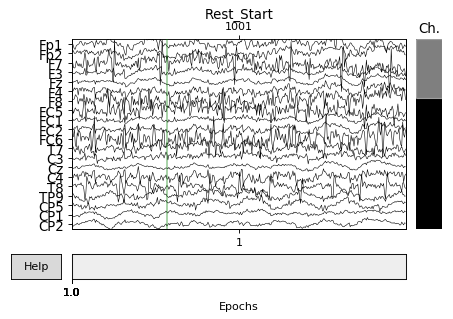

In [68]:
epochs.plot();

# Marking bad channels
### Based on visualization.


In [69]:
eeg_dat.info['bads'] = ['TP9']

In [70]:
print('Bad channels: ', eeg_dat.info['bads'])

Bad channels:  ['TP9']


1132 events found
Events id: [   1    2    3   11   12   13   14   21   22   23   24   31   32   33
   34 1001 1002]
Found %s events.

event 1 missing from event_id will be ignored
event 2 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 11 missing from event_id will be ignored
event 12 missing from event_id will be ignored
event 13 missing from event_id will be ignored
event 14 missing from event_id will be ignored
event 21 missing from event_id will be ignored
event 22 missing from event_id will be ignored
event 23 missing from event_id will be ignored
event 24 missing from event_id will be ignored
event 31 missing from event_id will be ignored
event 32 missing from event_id will be ignored
event 33 missing from event_id will be ignored
event 34 missing from event_id will be ignored
event 1002 missing from event_id will be ignored


<ipython-input-71-d8f294776125>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-71-d8f294776125>:12: RuntimeWarning: event 2 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-71-d8f294776125>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-71-d8f294776125>:12: RuntimeWarning: event 11 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-71-d8f294776125>:12: RuntimeWarning: event 12 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-71-d8f294776125>:12: RuntimeWarning: event 13 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-71-d8f294776125>:12: RuntimeWarning: event 14 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-71-d8f294776125>:12: RuntimeWarning: event 21 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-71-d8f294776125>:12:

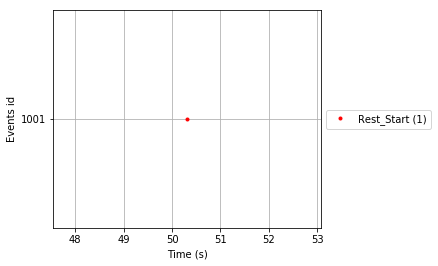

In [71]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Rest_Start': 1001}
color = {1001:'red'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id);

# Marking bad moments
### Identifying bad moments based on visualization

In [ ]:
# Not to critical for this data

In [93]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, tmin = 5, tmax = 115,
                    baseline = None, preload=True)

1 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 1 events and 55001 original time points ...
0 bad epochs dropped


In [94]:
chs = mne.channels.read_montage('standard_1020', epochs.ch_names[:-1])
epochs.set_montage(chs)

<Epochs  |  n_events : 1 (all good), tmin : 5.0 (s), tmax : 115.0 (s), baseline : None, ~27.5 MB, data loaded>

In [95]:
epochs.drop_bad()

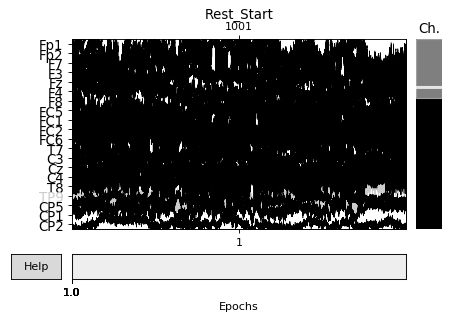

In [96]:
epochs.plot();

In [97]:
epochs._data.shape

(1, 65, 55001)

In [36]:
#epochs.

In [18]:
#epochs.plot_psd(fmin = 0.5, fmax = 40);

In [118]:
# Calculate PSD
psd, freqs = mne.time_frequency.psd_welch(epochs, fmin=1., fmax=50., n_fft=1000, n_overlap=500)


Effective window size : 2.000 (s)


In [119]:
# Get freq res of PSD
f_res = np.mean(np.diff(freqs))

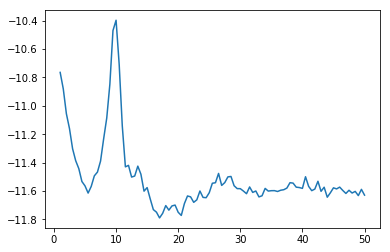

In [120]:
plt.plot(freqs, np.log10(psd[0, 30, :]))

# FOOOFing Data

In [121]:
fooof_psd = np.squeeze(psd[0,:,:])

In [122]:
fooof_psd.shape

(63, 99)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 35 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):    

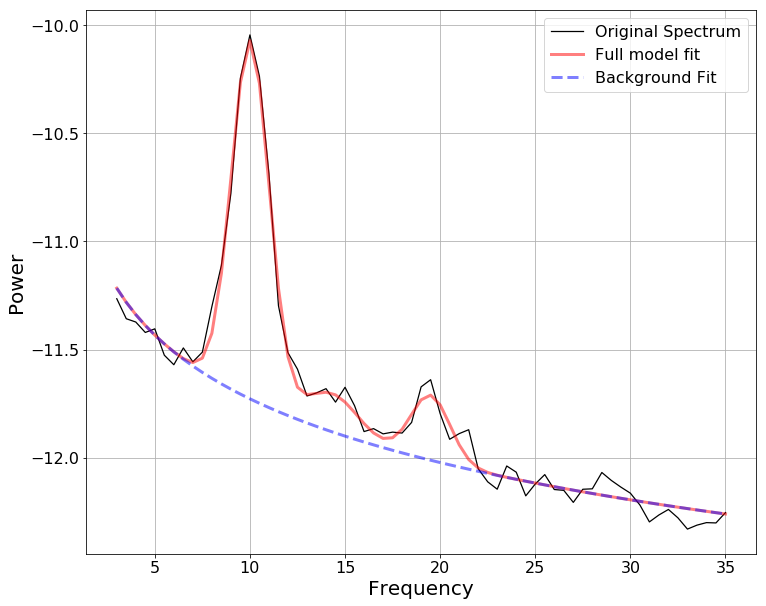

In [123]:
# Initialzing FOOOF model
fm = FOOOF()

# Setting frequency range
freq_range = [3, 35]

fm.report(freqs, fooof_psd[29 , :], freq_range)

In [82]:
# Run FOOOF across a group of PSDs
fg = FOOOFGroup(verbose=False)
fg.fit(freqs, fooof_psds, freq_range)

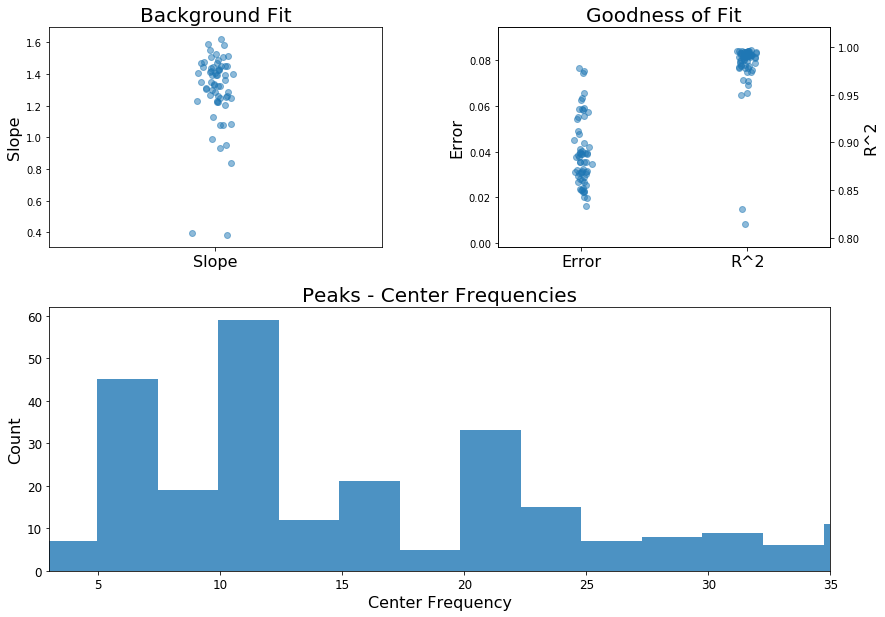

In [83]:
fg.plot()

In [ ]:
# Get all osc data. Loses channel information. NO good. 
osc_dat = fg.get_all_dat('oscillations_params')
osc_dat.shape

In [85]:
n_channels, n_freq = fooof_psds.shape

In [86]:
n_channels

63

In [87]:
fooof_results = np.zeros(shape = [n_channels,3])

In [89]:
# NOTE:
def get_band_osc(osc_params, band_def, ret_one=True):
    """Searches for a given band of interest within a list of oscillation
    
    Parameters
    ----------
    osc_params : 2d array
        Oscillations parameters, from FOOOF. [n_oscs, 3] 
    band_def : [float, float]
        Defines the band of interest
    ret_one : bool
        Whether to return single oscillation (or all found)
        
    Return
    ---------
    osc_out : array
        Osc data, form - (centers, powers, bws, # oscillations).  
    """
    
    # Catch & return if empty
    if not np.all(osc_params):
        return [np.nan, np.nan, np.nan]
    
    # Find indices of oscillations in the specified range
    osc_inds = (osc_params[:, 0] >= band_def[0]) & (osc_params[:, 0] <= band_def[1])
    
    # Gets the number of oscillations within the specified range
    n_oscs = sum(osc_inds)
    
    # If there are no 
    if n_oscs == 0:
        return np.array([np.nan, np.nan, np.nan])
    
    band_oscs = osc_params[osc_inds, :]

    # If results > 1 and ret_one, then we return the highest power oscillation
    #    Call a sub-function to select highest power oscillation
    #.   Note: see omegamappin/om/meg/single.py - _get_single_osc_power function. 
    if n_oscs > 1 and ret_one:
        # Get highest power oscillation in band
        band_oscs = get_highest_power_osc(band_oscs)
    
    # If results == 1, return osc - [cen, power, bw]
    return np.squeeze(band_oscs)


In [90]:
fg.group_results[6].oscillations_params

AttributeError: 'FOOOFResult' object has no attribute 'oscillations_params'

In [ ]:
get_band_osc(fg.group_results[6].oscillations_params,[10,12])

In [ ]:
for i, ch_dat in enumerate(fg.group_results):
    fooof_results[i,:] = get_band_osc(ch_dat.oscillations_params, [8, 12])

In [ ]:
fooof_results.shape

In [ ]:
cfs = fooof_results[:, 0]
amps = fooof_results[:, 1]
bws = fooof_results[:,2]

In [ ]:
cfs

In [ ]:
amps

In [ ]:
bws

In [ ]:
cfs = np.nan_to_num(cfs)
amps = np.nan_to_num(amps)
bws = np.nan_to_num(bws)

In [ ]:
# Define our oscillation bands
bands = [['Theta', [4, 8]], ['Alpha', [8, 12]]]

In [ ]:
# DESIRED OUTPUT:
#  1d array, len of n_channels with osc_band freq for each channel
#  Note: deal with the band in channel: try out different markers for none (0, nan, etc.)

# Mapping

In [ ]:
montage = mne.channels.read_montage('standard_1020', epochs.ch_names[:-1])
epochs.set_montage(montage)

In [ ]:
mne.viz.plot_topomap(cfs, epochs.info, cmap=cm.viridis, contours=0);

In [ ]:
mne.viz.plot_topomap(amps, epochs.info, cmap=cm.viridis, contours=0);

In [ ]:
mne.viz.plot_topomap(bws, epochs.info, cmap=cm.viridis, contours=0);